# Chapter 3: Demo Logistic Regression - Buy car?
- Xây dựng model dự đoán một khách hàng có mua xe hay không dựa trên thông tin về ‘Age’ và ‘EstimatedSalary_K’ (mức lương ước tính – đơn vị tính 1000$)

In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [104]:
# Dataset: https://www.kaggle.com/rakeshrau/social-network-ads

In [105]:
data = pd.read_csv("Data/Social_Network_Ads.csv", 
                   usecols=['Age', 'EstimatedSalary_K', 'Purchased'])

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                400 non-null    int64
 1   EstimatedSalary_K  400 non-null    int64
 2   Purchased          400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [107]:
data.head()

,Age,EstimatedSalary_K,Purchased
0,19,19,0
1,35,20,0
2,26,43,0
3,27,57,0
4,19,76,0


In [108]:
data.describe()

,Age,EstimatedSalary_K,Purchased
count,400.000000,400.00000,400.000000
mean,37.655000,69.74250,0.357500
std,10.482877,34.09696,0.479864
min,18.000000,15.00000,0.000000
25%,29.750000,43.00000,0.000000
50%,37.000000,70.00000,0.000000
75%,46.000000,88.00000,1.000000
max,60.000000,150.00000,1.000000


In [109]:
data.groupby('Purchased').count()# để xem dl có cân bằn ko

,Age,EstimatedSalary_K
Purchased,,
0,257,257
1,143,143


In [110]:
X = data[['Age', 'EstimatedSalary_K']]
X.head()

,Age,EstimatedSalary_K
0,19,19
1,35,20
2,26,43
3,27,57
4,19,76


In [111]:
Y = data['Purchased']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split   

In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
clf = LogisticRegression()

In [116]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [117]:
# Tính toán xác suất của lớp cho tập dữ liệu thử nghiệm 
# bằng cách sử dụng hàm ‘predict_proba’.
# clf.predict_proba(X_test)

In [118]:
print('Train score: ', clf.score(X_train,Y_train))

Train score:  0.8392857142857143


In [119]:
print('Test score: ', clf.score(X_test,Y_test))

Test score:  0.8416666666666667


In [120]:
from sklearn.metrics import accuracy_score 
Yhat_test = clf.predict(X_test)
clf.predict_proba(X_test)
#print("Test Accuracy is ", accuracy_score(Y_test,Yhat_test)*100,"%") cách 2 tinh R^2
# 0-1

array([[5.58214127e-01, 4.41785873e-01],
       [4.11736287e-01, 5.88263713e-01],
       [3.25704853e-01, 6.74295147e-01],
       [6.15555017e-01, 3.84444983e-01],
       [9.92755777e-01, 7.24422303e-03],
       [9.93010032e-01, 6.98996759e-03],
       [9.97968972e-01, 2.03102755e-03],
       [2.55685127e-01, 7.44314873e-01],
       [9.01909515e-01, 9.80904854e-02],
       [5.46410250e-01, 4.53589750e-01],
       [9.24180937e-01, 7.58190629e-02],
       [9.85878656e-01, 1.41213437e-02],
       [5.96503522e-01, 4.03496478e-01],
       [9.99428999e-01, 5.71000533e-04],
       [8.35165695e-01, 1.64834305e-01],
       [9.92502070e-01, 7.49793020e-03],
       [8.18018514e-01, 1.81981486e-01],
       [5.22111183e-02, 9.47788882e-01],
       [9.91799665e-01, 8.20033494e-03],
       [6.89220950e-01, 3.10779050e-01],
       [7.79862879e-01, 2.20137121e-01],
       [3.58244520e-02, 9.64175548e-01],
       [9.95669424e-01, 4.33057590e-03],
       [9.63930045e-01, 3.60699550e-02],
       [1.509251

In [121]:
Yhat_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [122]:
cm = confusion_matrix(Y_test, Yhat_test)
cm

NameError: name 'confusion_matrix' is not defined

In [123]:
Yhat_train = clf.predict(X_train)

In [124]:
clf.intercept_

array([-12.82965299])

In [125]:
clf.coef_

array([[0.23811253, 0.03990312]])

In [126]:

#tuong ung voi intercept, 

### Trực quan hóa 1

In [127]:
import seaborn as sns

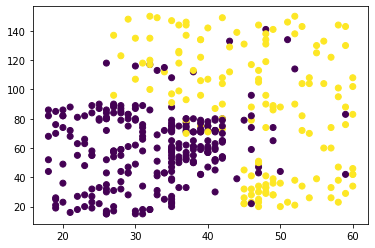

In [128]:
plt.scatter(X.Age , X.EstimatedSalary_K, c= Y) # c là color tuonưg tự như hue của seaborn

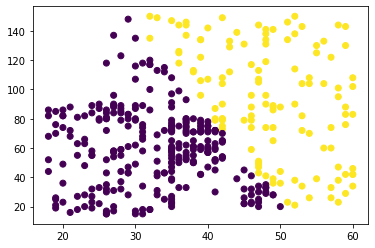

In [129]:
plt.scatter(X.Age , X.EstimatedSalary_K, c= clf.predict(X))

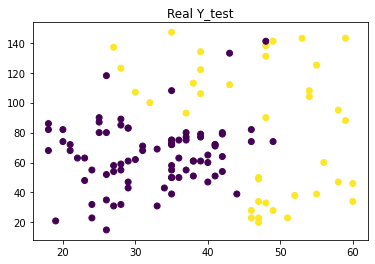

In [130]:
plt.scatter(X_test.Age , X_test.EstimatedSalary_K, 
            c=Y_test)
plt.title('Real Y_test')
plt.show()

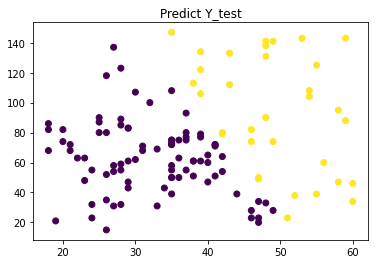

In [131]:
plt.scatter(X_test.Age , X_test.EstimatedSalary_K, 
            c=Yhat_test)
plt.title('Predict Y_test')
plt.show()

### Trực quan hóa 2

In [132]:
from matplotlib.colors import ListedColormap

In [133]:
X_set, Y_set = X_test, Y_test

In [134]:
X_set.head()

,Age,EstimatedSalary_K
203,41,71
362,47,50
350,38,113
348,39,77
86,24,55


In [135]:
np.unique(Y_set)

array([0, 1], dtype=int64)

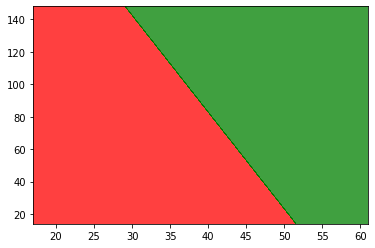

In [136]:
# so sánh giữa real test (điểm dữ liệu) và prediction test (phần xanh/đỏ)
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set.Age.min()-1,stop=X_set.Age.max()+1,step=0.01), 
                    np.arange(start = X_set.EstimatedSalary_K.min()-1,stop=X_set.EstimatedSalary_K.max()+1,
                              step=0.01))
plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# plt.scatter(X_set.Age, X_set.EstimatedSalary_K, c=Y_set, cmap=ListedColormap(('red','green')))
# plt.xlabel('Age')
# plt.ylabel('EstimatedSalary_K')
# plt.title('Real test data points in Prediction areas')
plt.show()

### Trực quan hóa 3

In [ ]:
X_now = [[40,120]]
Y_now = clf.predict(X_now)
Y_now